# Trends, seasonality and stationarity
----------------------------------------------

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import statsmodels as sm
import scipy.stats as stats
from scipy.ndimage.interpolation import shift
import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm


In [2]:
from statsmodels.graphics.api import qqplot

In [88]:
Data = pd.read_csv('data-1.csv',
                             index_col=['date'],
                             decimal =',',
                             dayfirst = True,
                             parse_dates=True)

Data.columns = ['indx', 'dane']
Data.describe()

,indx,dane
count,70.000000,70.000000
mean,0.909854,0.507857
std,1.884844,0.670515
min,-2.915657,-1.000000
25%,-0.413110,0.050000
50%,0.727916,0.410000
75%,1.820389,0.940000
max,7.506650,2.820000


In [89]:
Data.head(4)

,indx,dane
date,,
2010-10-01,0.211742,-0.44
2010-11-01,0.987522,1.65
2010-12-01,5.314398,1.65
2011-01-01,2.813850,1.61


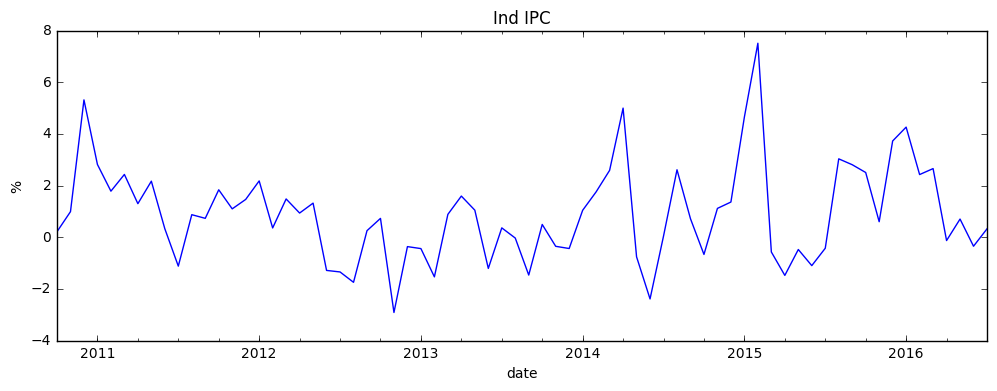

In [93]:
Data.indx.plot(figsize=(12,4))
plt.title('Ind IPC')
plt.ylabel('%')

# Trends and seasonality

http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/

http://www.cbcity.de/timeseries-decomposition-in-python-with-statsmodels-and-pandas

Troubles if freq $\ne$ 12 in the code below!

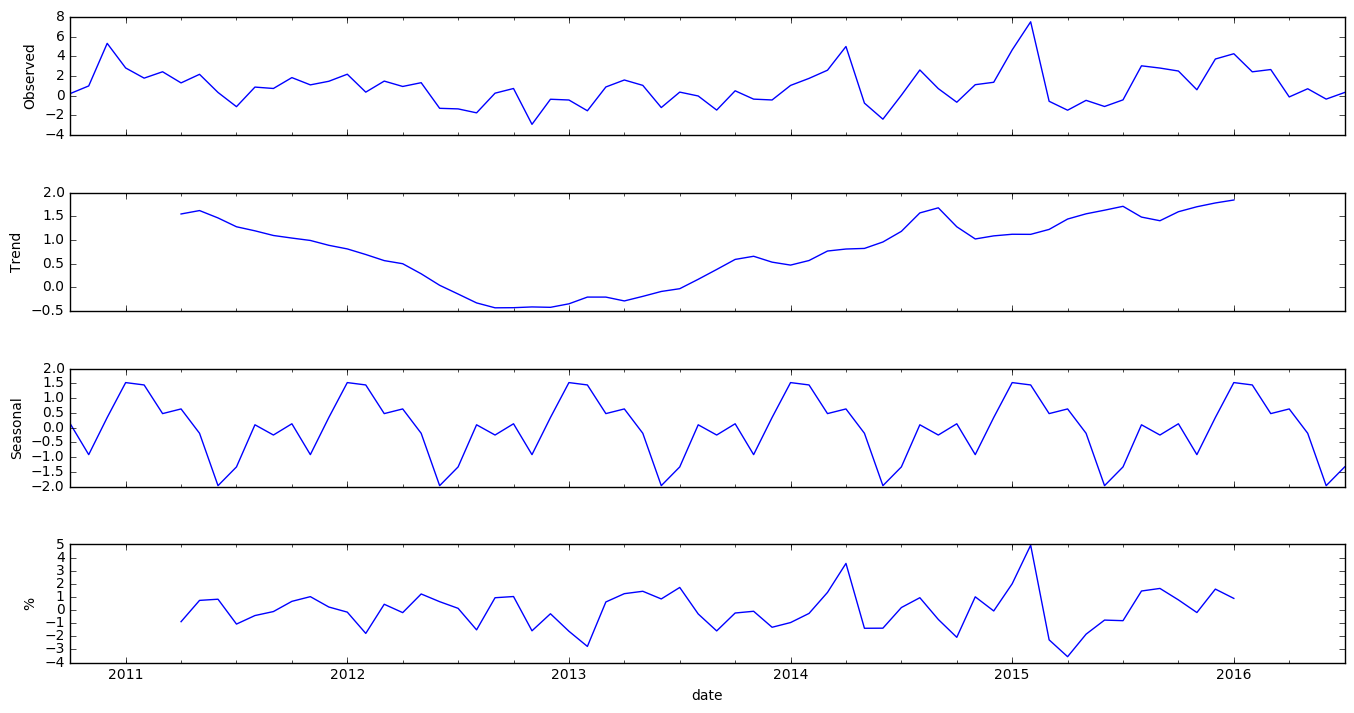

In [94]:
decompfreq = 12
decomposition = sm.tsa.seasonal_decompose(Data.indx.interpolate(), freq = 12, model='additive')
fig = plt.figure()  
fig = decomposition.plot()  
plt.ylabel('%')
fig.set_size_inches(15, 8)

## Stationarity

http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html

In [92]:
#Perform Dickey-Fuller test:
print 'Results of Dickey-Fuller Test:'
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(Data.indx, autolag='AIC')
dftest

Results of Dickey-Fuller Test:


(-5.3336454913775384,
 4.66204763232499e-06,
 0,
 69,
 {'1%': -3.528889992207215,
  '10%': -2.5896556542743121,
  '5%': -2.9044395987933362},
 233.43082004304091)

No kpss in statsmdels. However check: 

http://denizstij.blogspot.com.co/2015/01/stationarity-test-with-kpss.html